# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
!pip install jupyter_black -q

In [2]:
import jupyter_black
import os

# import warnings
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from IPython.display import display, HTML

jupyter_black.load()

In [3]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.dummy import DummyRegressor

In [4]:
import pandas as pd

# Глобальные настройки Pandas для вывода всех столбцов и строк с прокруткой
pd.set_option("display.max_columns", 30)  # Максимум 30 столбцов
pd.set_option("display.max_rows", 20)  # Максимум 20 строк для вывода
pd.set_option(
    "display.float_format", "{:.2f}".format
)  # Форматирование чисел с двумя знаками после запятой
pd.set_option("display.max_colwidth", 100)  # Ширина колонок
pd.set_option("display.width", 1000)  # Общая ширина окна для вывода

### Откройте файлы и изучите их.

In [5]:
try:
    data_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
    data_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
    data_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")
except FileNotFoundError as e:
    print(f"File not found: {str(e)}")
except pd.errors.EmptyDataError as e:
    print(f"Empty data: {str(e)}")
except pd.errors.ParserError as e:
    print(f"Parser error: {str(e)}")

In [6]:
# Полная таблица
df_full = data_full.copy()
# Тренировочная таблица
df_train = data_train.copy()
# Тестовая таблица
df_test = data_test.copy()

In [7]:
# Посмотрим на размеры таблиц
print(len(df_full))
print(len(df_train))
print(len(df_test))

19439
14149
5290


#### Расшифровка и перевод названия каждой колонки:

In [8]:
# вывести названия столбцов для перевода и объяснения названий столбцов:
# for index, column in enumerate(df_full.columns):
#     print(f"{index+1}. {column}")
# Работает на decktop

<div style="max-height: 200px; max-width: 1200px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">


date — дата.  
final.output.concentrate_ag — содержание серебра (Ag) в конечном концентрате.  
final.output.concentrate_pb — содержание свинца (Pb) в конечном концентрате.  
final.output.concentrate_sol — содержание твердых веществ в конечном концентрате.  
final.output.concentrate_au — содержание золота (Au) в конечном концентрате.  
    final.output.recovery — коэффициент извлечения в конечном этапе.  
final.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) конечного этапа.  
final.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) конечного этапа.  
final.output.tail_sol — содержание твердых веществ в хвостах (отходах) конечного этапа.  
final.output.tail_au — содержание золота (Au) в хвостах (отходах) конечного этапа.  
primary_cleaner.input.sulfate — содержание сульфатов на входе первичной очистки.  
primary_cleaner.input.depressant — содержание депрессора на входе первичной очистки.  
primary_cleaner.input.feed_size — размер подачи на входе первичной очистки.  
primary_cleaner.input.xanthate — содержание ксантата на входе первичной очистки.  
primary_cleaner.output.concentrate_ag — содержание серебра (Ag) в концентрате на выходе первичной очистки.  
primary_cleaner.output.concentrate_pb — содержание свинца (Pb) в концентрате на выходе первичной очистки.  
primary_cleaner.output.concentrate_sol — содержание твердых веществ в концентрате на выходе первичной очистки.  
primary_cleaner.output.concentrate_au — содержание золота (Au) в концентрате на выходе первичной очистки.  
primary_cleaner.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) на выходе первичной очистки.  
primary_cleaner.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) на выходе первичной очистки.  
primary_cleaner.output.tail_sol — содержание твердых веществ в хвостах (отходах) на выходе первичной очистки.  
primary_cleaner.output.tail_au — содержание золота (Au) в хвостах (отходах) на выходе первичной очистки.  
primary_cleaner.state.floatbank8_a_air — подача воздуха в камере "а" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_a_level — уровень жидкости в камере "а" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_b_air — подача воздуха в камере "b" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_b_level — уровень жидкости в камере "b" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_c_air — подача воздуха в камере "c" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_c_level — уровень жидкости в камере "c" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_d_air — подача воздуха в камере "d" флотационной установки № 8 на первичной очистке.  
primary_cleaner.state.floatbank8_d_level — уровень жидкости в камере "d" флотационной установки № 8 на первичной очистке.  
rougher.calculation.sulfate_to_au_concentrate — расчетное отношение сульфатов к концентрации золота.  
rougher.calculation.floatbank10_sulfate_to_au_feed — расчетное отношение сульфатов к подаче золота во флотационной установке № 10.  
rougher.calculation.floatbank11_sulfate_to_au_feed — расчетное отношение сульфатов к подаче золота во флотационной установке № 11.  
rougher.calculation.au_pb_ratio — расчетное соотношение золота (Au) к свинцу (Pb).  
rougher.input.feed_ag — содержание серебра (Ag) на входе грубой флотации.  
rougher.input.feed_pb — содержание свинца (Pb) на входе грубой флотации.  
rougher.input.feed_rate — скорость подачи на входе грубой флотации.  
rougher.input.feed_size — размер частиц на входе грубой флотации.  
rougher.input.feed_sol — содержание твердых веществ на входе грубой флотации.  
    rougher.input.feed_au — содержание золота (Au) на входе грубой флотации.  
rougher.input.floatbank10_sulfate — содержание сульфатов во флотационной установке № 10.  
rougher.input.floatbank10_xanthate — содержание ксантата во флотационной установке № 10.  
rougher.input.floatbank11_sulfate — содержание сульфатов во флотационной установке № 11.  
rougher.input.floatbank11_xanthate — содержание ксантата во флотационной установке № 11.  
rougher.output.concentrate_ag — содержание серебра (Ag) в концентрате на выходе грубой флотации.  
rougher.output.concentrate_pb — содержание свинца (Pb) в концентрате на выходе грубой флотации.  
rougher.output.concentrate_sol — содержание твердых веществ в концентрате на выходе грубой флотации.  
    rougher.output.concentrate_au — содержание золота (Au) в концентрате на выходе грубой флотации.  
    rougher.output.recovery — коэффициент извлечения на грубой флотации.  
rougher.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) грубой флотации.  
rougher.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) грубой флотации.  
rougher.output.tail_sol — содержание твердых веществ в хвостах (отходах) грубой флотации.  
    rougher.output.tail_au — содержание золота (Au) в хвостах (отходах) грубой флотации.  
rougher.state.floatbank10_a_air — подача воздуха в камере "a" флотационной установки № 10.  
rougher.state.floatbank10_a_level — уровень жидкости в камере "a" флотационной установки № 10.  
rougher.state.floatbank10_b_air — подача воздуха в камере "b" флотационной установки № 10.  
rougher.state.floatbank10_b_level — уровень жидкости в камере "b" флотационной установки № 10.  
rougher.state.floatbank10_c_air — подача воздуха в камере "c" флотационной установки № 10.  
rougher.state.floatbank10_c_level — уровень жидкости в камере "c" флотационной установки № 10.  
rougher.state.floatbank10_d_air — подача воздуха в камере "d" флотационной установки № 10.  
rougher.state.floatbank10_d_level — уровень жидкости в камере "d" флотационной установки № 10.  
rougher.state.floatbank10_e_air — подача воздуха в камере "e" флотационной установки № 10.  
rougher.state.floatbank10_e_level — уровень жидкости в камере "e" флотационной установки № 10.  
rougher.state.floatbank10_f_air — подача воздуха в камере "f" флотационной установки № 10.  
rougher.state.floatbank10_f_level — уровень жидкости в камере "f" флотационной установки № 10.  
secondary_cleaner.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) на выходе вторичной очистки.  
secondary_cleaner.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) на выходе вторичной очистки.  
secondary_cleaner.output.tail_sol — содержание твердых веществ в хвостах (отходах) на выходе вторичной очистки.  
secondary_cleaner.output.tail_au — содержание золота (Au) в хвостах (отходах) на выходе вторичной очистки.  
secondary_cleaner.state.floatbank2_a_air — подача воздуха в камере "a" флотационной установки № 2 на вторичной очистке.  
secondary_cleaner.state.floatbank2_a_level — уровень жидкости в камере "a" флотационной установки № 2 на вторичной очистке.  
secondary_cleaner.state.floatbank2_b_air — подача воздуха в камере "b" флотационной установки № 2 на вторичной очистке.  
secondary_cleaner.state.floatbank2_b_level — уровень жидкости в камере "b" флотационной установки № 2 на вторичной очистке.  
secondary_cleaner.state.floatbank3_a_air — подача воздуха в камере "a" флотационной установки № 3 на вторичной очистке.  
secondary_cleaner.state.floatbank3_a_level — уровень жидкости в камере "a" флотационной установки № 3 на вторичной очистке.  
secondary_cleaner.state.floatbank3_b_air — подача воздуха в камере "b" флотационной установки № 3 на вторичной очистке.  
secondary_cleaner.state.floatbank3_b_level — уровень жидкости в камере "b" флотационной установки № 3 на вторичной очистке.  
secondary_cleaner.state.floatbank4_a_air — подача воздуха в камере "a" флотационной установки № 4 на вторичной очистке.  
secondary_cleaner.state.floatbank4_a_level — уровень жидкости в камере "a" флотационной установки № 4 на вторичной очистке.  
secondary_cleaner.state.floatbank4_b_air — подача воздуха в камере "b" флотационной установки № 4 на вторичной очистке.  
secondary_cleaner.state.floatbank4_b_level — уровень жидкости в камере "b" флотационной установки № 4 на вторичной очистке.  
secondary_cleaner.state.floatbank5_a_air — подача воздуха в камере "a" флотационной установки № 5 на вторичной очистке.  
secondary_cleaner.state.floatbank5_a_level — уровень жидкости в камере "a" флотационной установки № 5 на вторичной очистке.  
secondary_cleaner.state.floatbank5_b_air — подача воздуха в камере "b" флотационной установки № 5 на вторичной очистке.  
secondary_cleaner.state.floatbank5_b_level — уровень жидкости в камере "b" флотационной установки № 5 на вторичной очистке.  
secondary_cleaner.state.floatbank6_a_air — подача воздуха в камере "a" флотационной установки № 6 на вторичной очистке.  
secondary_cleaner.state.floatbank6_a_level — уровень жидкости в камере "a" флотационной установки № 6 на вторичной очистке.  
</div>

### Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Эффективность обогащение считается по следующей формуле

$$ Recovery = \frac{ C * ( F - T ) } { F * ( C - T ) } * 100 \%$$

где:  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.  

C = rougher.output.concentrate_au — содержание золота (Au) в концентрате на выходе грубой флотации.  
F = rougher.input.feed_au — содержание золота (Au) на входе грубой флотации.  
T = rougher.output.tail_au — содержание золота (Au) в хвостах (отходах) грубой флотации.  
Recovery = rougher.output.recovery — коэффициент извлечения на грубой флотации.

$$ Recovery = \frac{rougher.output.concentrate\_au*(rougher.input.feed\_au - rougher.output.tail\_au)} {rougher.input.feed\_au*(rougher.output.concentrate\_au-rougher.output.tail\_au)} $$

In [9]:
# для возможности подсчета удалим пропуски в таблице df_full
df_full.ffill(inplace=True)

In [10]:
# Считаем recovery
df_full["check_recovery"] = (
    (
        df_full["rougher.output.concentrate_au"]
        * (df_full["rougher.input.feed_au"] - df_full["rougher.output.tail_au"])
    )
    / (
        df_full["rougher.input.feed_au"]
        * (df_full["rougher.output.concentrate_au"] - df_full["rougher.output.tail_au"])
    )
    * 100
)

In [11]:
# df_full.info()

In [12]:
df_full[["rougher.output.recovery", "check_recovery"]]

,rougher.output.recovery,check_recovery
0,87.11,87.11
1,86.84,86.84
2,86.84,86.84
3,87.23,87.23
4,86.69,86.69
...,...,...
19434,89.57,89.57
19435,87.72,87.72
19436,88.89,88.89
19437,89.86,89.86


In [13]:
count_round = 10  # Количество знаков после запятой, для удобства округления
for _, row in df_full.iterrows():
    if round(row["rougher.output.recovery"], count_round) != round(
        row["check_recovery"], count_round
    ):
        print(row["rougher.output.recovery"], row["check_recovery"])
# цифры в которых есть расхождение между оригинальным и проверочным значениями.

85.83197995254999 85.83197995255
88.72418030834999 88.72418030835001


In [14]:
mae = mean_absolute_error(
    round(df_full["rougher.output.recovery"], count_round),
    round(df_full["check_recovery"], count_round),
)

print(f"MAE: {mae}")

MAE: 1.0287316608484109e-14


#### Промежуточный вывод по проверке расчета rougher.output.recovery  

Применив округление до 7 знаков после запятой, получаем MAE = 0. Обогащение рассчитано верно.  
Если абсолютные цифры то MAE имеет порядок величины 9.744162819507459e-15, это указывает на минимальную разницу, связанную с вычислительными округлениями, разница связана с машинной ошибкой округления и не представляет практической проблемы.


### Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

#### Столобцы которые отсутствуют в df_test с переводом

<div style="max-height: 200px; max-width: 1300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">


rougher.output.concentrate_au — содержание золота (Au) в концентрате на выходе грубой флотации.  
primary_cleaner.output.tail_au — содержание золота (Au) в хвостах (отходах) на выходе первичной очистки.  
secondary_cleaner.output.tail_sol — содержание твердых веществ в хвостах (отходах) на выходе вторичной очистки.  
check_recovery
final.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) конечного этапа.  
final.output.concentrate_ag — содержание серебра (Ag) в конечном концентрате.  
rougher.output.tail_sol — содержание твердых веществ в хвостах (отходах) грубой флотации.  
secondary_cleaner.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) на выходе вторичной очистки.  
rougher.output.tail_au — содержание золота (Au) в хвостах (отходах) грубой флотации.  
primary_cleaner.output.concentrate_au — содержание золота (Au) в концентрате на выходе первичной очистки.  
final.output.tail_au — содержание золота (Au) в хвостах (отходах) конечного этапа.  
primary_cleaner.output.tail_sol — содержание твердых веществ в хвостах (отходах) на выходе первичной очистки.  
rougher.output.concentrate_sol — содержание твердых веществ в концентрате на выходе грубой флотации.  
primary_cleaner.output.concentrate_ag — содержание серебра (Ag) в концентрате на выходе первичной очистки.  
final.output.concentrate_sol — содержание твердых веществ в конечном концентрате.  
final.output.tail_sol — содержание твердых веществ в хвостах (отходах) конечного этапа.  
rougher.calculation.floatbank11_sulfate_to_au_feed — расчетное отношение сульфатов к подаче золота во флотационной установке № 11.  
rougher.output.recovery — коэффициент извлечения на грубой флотации.  
rougher.output.concentrate_pb — содержание свинца (Pb) в концентрате на выходе грубой флотации.  
primary_cleaner.output.concentrate_sol — содержание твердых веществ в концентрате на выходе первичной очистки.  
final.output.recovery — коэффициент извлечения в конечном этапе.  
primary_cleaner.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) на выходе первичной очистки.  
final.output.concentrate_au — содержание золота (Au) в конечном концентрате.  
rougher.calculation.sulfate_to_au_concentrate — расчетное отношение сульфатов к концентрации золота.  
secondary_cleaner.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) на выходе вторичной очистки.  
primary_cleaner.output.concentrate_pb — содержание свинца (Pb) в концентрате на выходе первичной очистки.  
primary_cleaner.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) на выходе первичной очистки.  
rougher.calculation.au_pb_ratio — расчетное соотношение золота (Au) к свинцу (Pb).  
rougher.calculation.floatbank10_sulfate_to_au_feed — расчетное отношение сульфатов к подаче золота во флотационной установке № 10.  
rougher.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) грубой флотации.  
secondary_cleaner.output.tail_au — содержание золота (Au) в хвостах (отходах) на выходе вторичной очистки.  
rougher.output.concentrate_ag — содержание серебра (Ag) в концентрате на выходе грубой флотации.  
rougher.output.tail_pb — содержание свинца (Pb) в хвостах (отходах) грубой флотации.  
final.output.tail_ag — содержание серебра (Ag) в хвостах (отходах) конечного этапа.  
final.output.concentrate_pb — содержание свинца (Pb) в конечном концентрате.  
</div>

Подсказка наставника  
Для достоверности результатов не стоит добавлять новые признаки. Если присмотреться к этим столбцам, это различные финальные параметры, к которым нет доступа во время технологического процесса. То есть тестовую выборку мы должны взять, как есть. Нужно добавить туда только два целевых признака. 
Ну а чтобы синхронизировать процесс обучения и теста, нужно убрать эти лишние признаки из обучающей выборки. 
Автоматически список всех таких признаков можно так: columns_not_in_test = set(df_train.columns) - set(df_test.columns) Но аккуратнее, так также содержатся целевые признаки.

Добавим недостающие ["rougher.output.recovery", "final.output.recovery"] из df_full.

In [15]:
# Объединение таблиц по ключевому столбцу ('date')
df_test = pd.merge(
    df_test,
    df_full[["date", "rougher.output.recovery", "final.output.recovery"]],
    on="date",
    how="left",
)

In [16]:
full = set(df_full.columns)
train = set(df_train.columns)
test = set(df_test.columns)

full_minus_train = full - train  # отсутствующие в train
# сравниваем train и test
train_minus_test = train - test  # отсутствующие в test
# print("\n".join(full_minus_train))  # full и train не отличаются
# print("\n".join(train_minus_test))

In [17]:
test = "\n".join(train_minus_test)
print(test)

rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_pb
secondary_cleaner.output.tail_sol
rougher.output.tail_pb
final.output.concentrate_au
final.output.tail_au
final.output.tail_ag
final.output.tail_pb
primary_cleaner.output.concentrate_pb
rougher.output.concentrate_au
primary_cleaner.output.concentrate_sol
secondary_cleaner.output.tail_pb
final.output.concentrate_ag
secondary_cleaner.output.tail_au
rougher.calculation.floatbank10_sulfate_to_au_feed
final.output.concentrate_sol
primary_cleaner.output.tail_sol
final.output.concentrate_pb
rougher.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_au
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
primary_cleaner.output.tail_ag
rougher.output.tail_ag
final.output.tail_sol
rougher.output.concentrate_ag
secondary_cleaner.output.tail_ag
primary_cleaner.output.concentrate_au
rougher.output.tail_sol
primary_cleaner.output.concentrate_ag
rougher.output.concentrate_s

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [19]:
# Теперь удалим столбцы котрых нет в df_test из df_train
df_train.drop(train_minus_test, axis=1, inplace=True)

In [20]:
print(len(df_train.columns))
print(len(df_test.columns))

55
55


### Предобработка данных

In [21]:
# Сколько пропусков в процентах
result = df_train.isna().mean().sort_values(ascending=False) * 100
result.head(10)

rougher.state.floatbank10_e_air            3.08
rougher.input.floatbank11_xanthate         3.02
secondary_cleaner.state.floatbank2_a_air   1.53
rougher.input.feed_size                    1.02
rougher.input.feed_pb                      0.71
primary_cleaner.input.xanthate             0.71
rougher.input.feed_sol                     0.55
rougher.input.floatbank11_sulfate          0.25
primary_cleaner.input.depressant           0.23
rougher.input.floatbank10_sulfate          0.20
dtype: float64

In [22]:
# Сколько пропусков в процентах
result = df_test.isna().mean().sort_values(ascending=False) * 100
result.head(10)

rougher.input.floatbank11_xanthate         0.47
rougher.input.feed_sol                     0.40
secondary_cleaner.state.floatbank3_a_air   0.17
rougher.input.floatbank11_sulfate          0.15
primary_cleaner.input.depressant           0.09
rougher.input.floatbank10_sulfate          0.09
primary_cleaner.input.xanthate             0.08
primary_cleaner.input.sulfate              0.08
secondary_cleaner.state.floatbank2_a_air   0.06
rougher.input.feed_rate                    0.06
dtype: float64

In [23]:
# есть ли строки с полностью нулевыми значениями
print((df_train.eq(0)).all(axis=1).sum())
print((df_test.eq(0)).all(axis=1).sum())

0
0


In [24]:
# Удалим везде нулевые значения и пропуски
for df in [df_full, df_train, df_test]:
    for i in df.columns:
        df[i] = df[i].replace(0, np.nan).ffill()

sum_rougher.input.feed


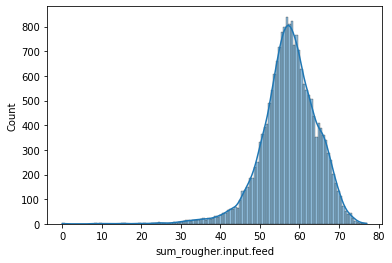

sum_rougher.output.concentrate


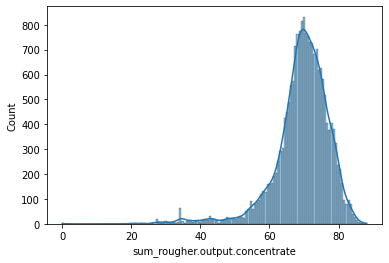

sum_primary_cleaner.output.tail


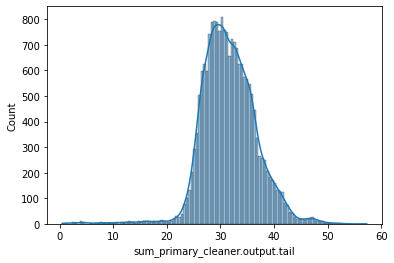

sum_final.output.concentrate


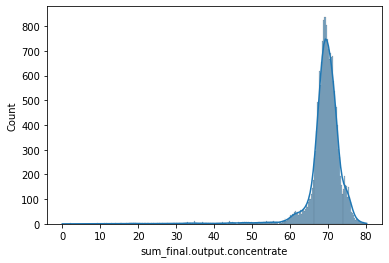

In [25]:
df = df_full
# на входе грубой флотации
df["sum_rougher.input.feed"] = (
    df["rougher.input.feed_ag"]
    + df["rougher.input.feed_pb"]
    + df["rougher.input.feed_sol"]
    + df["rougher.input.feed_au"]
)
# на выходе грубой флотации
df["sum_rougher.output.concentrate"] = (
    df["rougher.output.concentrate_ag"]
    + df["rougher.output.concentrate_pb"]
    + df["rougher.output.concentrate_sol"]
    + df["rougher.output.concentrate_au"]
)
# на выходе первичной очистки
df["sum_primary_cleaner.output.tail"] = (
    df["primary_cleaner.output.tail_ag"]
    + df["primary_cleaner.output.tail_pb"]
    + df["primary_cleaner.output.tail_sol"]
    + df["primary_cleaner.output.tail_au"]
)

df["sum_final.output.concentrate"] = (
    df["final.output.concentrate_ag"]
    + df["final.output.concentrate_pb"]
    + df["final.output.concentrate_sol"]
    + df["final.output.concentrate_au"]
)

for i in [
    "sum_rougher.input.feed",
    "sum_rougher.output.concentrate",
    "sum_primary_cleaner.output.tail",
    "sum_final.output.concentrate",
]:
    print(i)
    plt.figure()
    sbn.histplot(df[i], kde=True)
    plt.show()

##### Вывод предобработка
 Удалил из таблицы df_train столбцы которых не было в df_test, за исключением целевых.
 Заменил пропуски близ лижайшими данными во всех таблицах

## Анализ данных

### Изменение концентрации металлов (Pb, Au, Ag) на различных этапах очистки.

#### Концентрации серебра, свинца и золота на ВХОДЕ 'грубой флотации'

Text(0, 0.5, 'Частота')

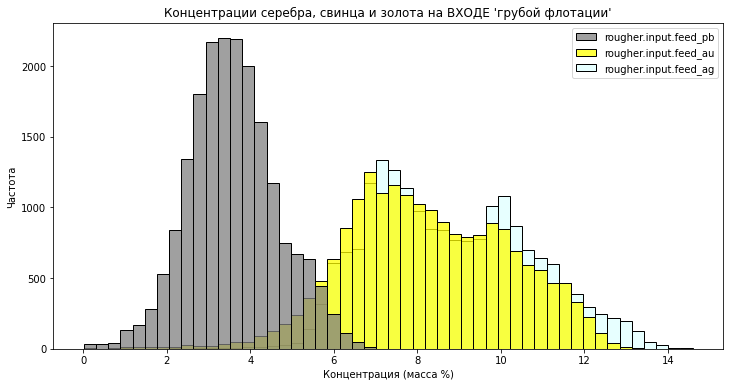

In [27]:
plt.figure(figsize=(12, 6))
palette = ["#808080", "#FFFF00", "#E0FFFF"]
sbn.histplot(
    df_full[
        ["rougher.input.feed_pb", "rougher.input.feed_au", "rougher.input.feed_ag"]
    ],
    palette=palette,
    bins=50,
)
plt.title("Концентрации серебра, свинца и золота на ВХОДЕ 'грубой флотации'")
plt.xlabel("Концентрация (масса %)")
plt.ylabel("Частота")

#### Концентрации свинца, золота и серебра на ВЫХОДЕ грубой флотации

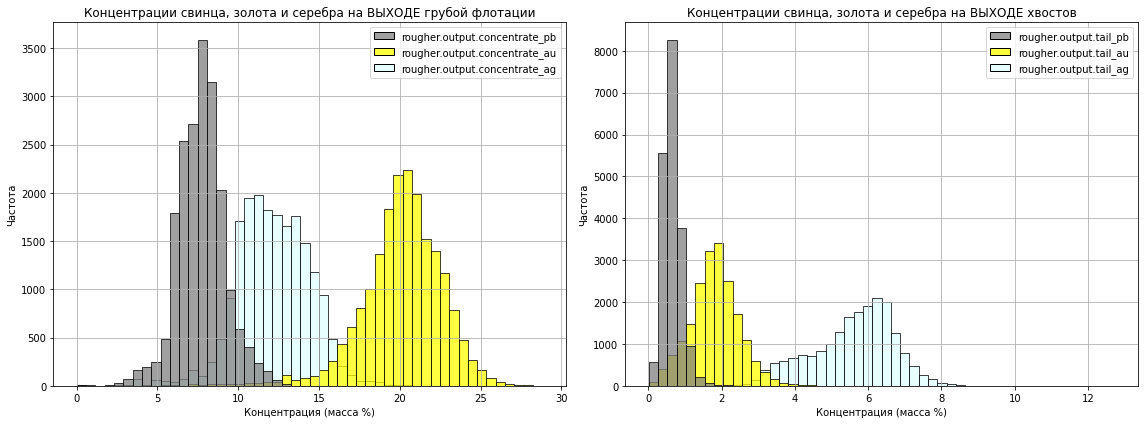

In [28]:
f, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 4]))
palette = ["#808080", "#FFFF00", "#E0FFFF"]
# Первый график на axs[0]
sbn.histplot(
    df_full[
        [
            "rougher.output.concentrate_pb",
            "rougher.output.concentrate_au",
            "rougher.output.concentrate_ag",
        ]
    ],
    ax=axs[0],
    palette=palette,
    bins=50,
)
axs[0].set_title("Концентрации свинца, золота и серебра на ВЫХОДЕ грубой флотации")
axs[0].set_xlabel("Концентрация (масса %)")
axs[0].set_ylabel("Частота")
axs[0].grid()

# Второй график на axs[1]
sbn.histplot(
    df_full[
        ["rougher.output.tail_pb", "rougher.output.tail_au", "rougher.output.tail_ag"]
    ],
    ax=axs[1],
    palette=palette,
    bins=50,
)
axs[1].set_title(
    "Концентрации свинца, золота и серебра на ВЫХОДЕ хвостов",
)
axs[1].set_xlabel("Концентрация (масса %)")
axs[1].set_ylabel("Частота")
axs[1].grid()

f.tight_layout()
plt.show()

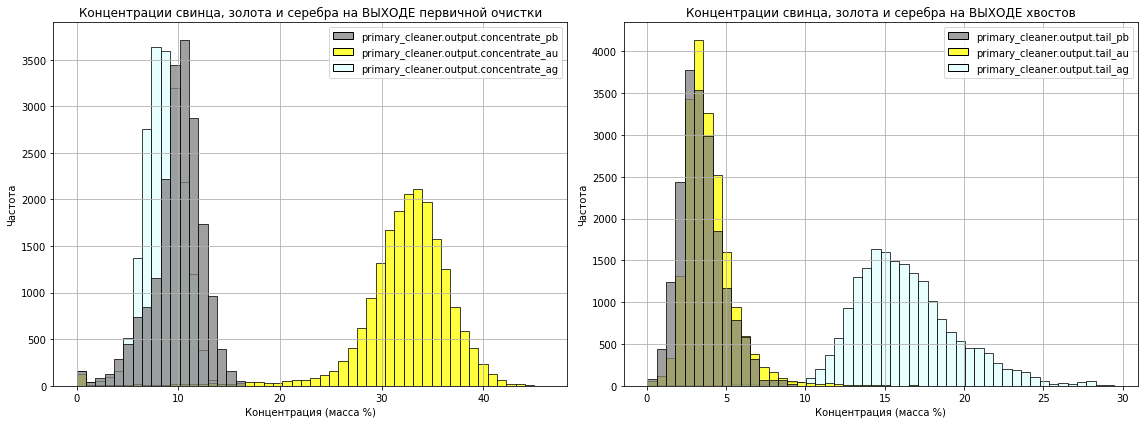

In [29]:
f, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 4]))
palette = ["#808080", "#FFFF00", "#E0FFFF"]
# Первый график на axs[0]
sbn.histplot(
    df_full[
        [
            "primary_cleaner.output.concentrate_pb",
            "primary_cleaner.output.concentrate_au",
            "primary_cleaner.output.concentrate_ag",
        ]
    ],
    ax=axs[0],
    palette=palette,
    bins=50,
)
axs[0].set_title("Концентрации свинца, золота и серебра на ВЫХОДЕ первичной очистки")
axs[0].set_xlabel("Концентрация (масса %)")
axs[0].set_ylabel("Частота")
axs[0].grid()

# Второй график на axs[1]
sbn.histplot(
    df_full[
        [
            "primary_cleaner.output.tail_pb",
            "primary_cleaner.output.tail_au",
            "primary_cleaner.output.tail_ag",
        ]
    ],
    ax=axs[1],
    palette=palette,
    bins=50,
)
axs[1].set_title(
    "Концентрации свинца, золота и серебра на ВЫХОДЕ хвостов",
)
axs[1].set_xlabel("Концентрация (масса %)")
axs[1].set_ylabel("Частота")
axs[1].grid()

f.tight_layout()
plt.show()

#### Концентрации свинца, золота и серебра на ВЫХОДЕ первичной очистки

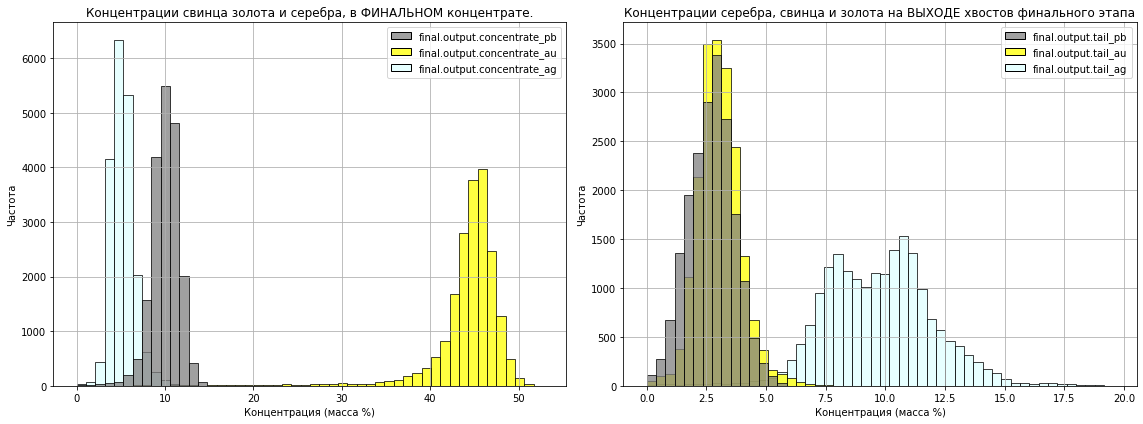

In [30]:
f, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 4]))
palette = ["#808080", "#FFFF00", "#E0FFFF"]

sbn.histplot(
    df_full[
        [
            "final.output.concentrate_pb",
            "final.output.concentrate_au",
            "final.output.concentrate_ag",
        ]
    ],
    ax=axs[0],
    palette=palette,
    bins=50,
)
axs[0].set_title("Концентрации свинца золота и серебра, в ФИНАЛЬНОМ концентрате.")
axs[0].set_xlabel("Концентрация (масса %)")
axs[0].set_ylabel("Частота")
axs[0].grid()

sbn.histplot(
    df_full[
        [
            "final.output.tail_pb",
            "final.output.tail_au",
            "final.output.tail_ag",
        ]
    ],
    ax=axs[1],
    palette=palette,
    bins=50,
)
axs[1].set_title(
    "Концентрации серебра, свинца и золота на ВЫХОДЕ хвостов финального этапа",
)
axs[1].set_xlabel("Концентрация (масса %)")
axs[1].set_ylabel("Частота")
axs[1].grid()

f.tight_layout()
plt.show()

#### Изменение средней концентрации золота на разных этапах

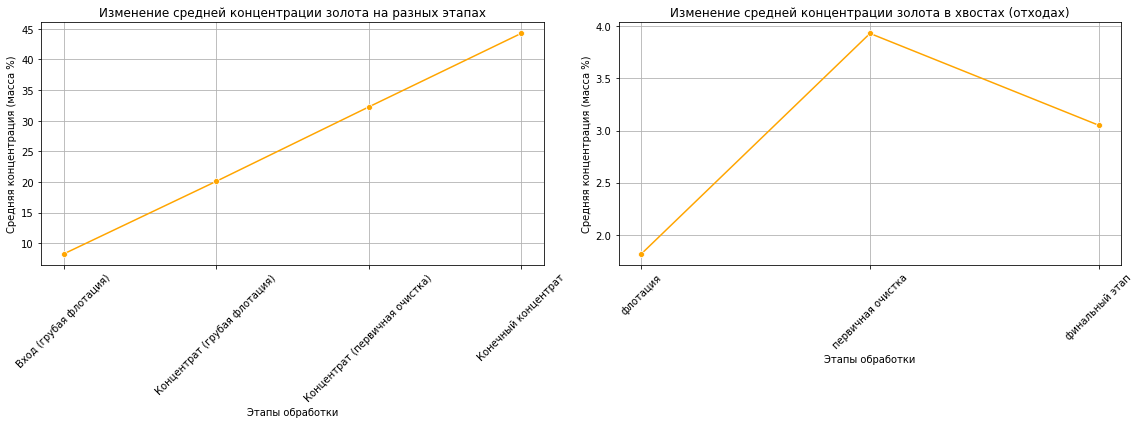

In [31]:
f, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 4]))
mean_concentrations = df_full[
    [
        "rougher.input.feed_au",
        "rougher.output.concentrate_au",
        "primary_cleaner.output.concentrate_au",
        "final.output.concentrate_au",
    ]
].mean()

stage_names = {
    "rougher.input.feed_au": "Вход (грубая флотация)",
    "rougher.output.concentrate_au": "Концентрат (грубая флотация)",
    "primary_cleaner.output.concentrate_au": "Концентрат (первичная очистка)",
    "final.output.concentrate_au": "Конечный концентрат",
}
mean_concentrations.rename(index=stage_names, inplace=True)
mean_concentrations_df = pd.DataFrame(
    {
        "Этапы": mean_concentrations.index,
        "Средняя концентрация": mean_concentrations.values,
    }
)
sbn.lineplot(
    ax=axs[0],
    data=mean_concentrations_df,
    x="Этапы",
    y="Средняя концентрация",
    marker="o",
    color="#FFA500",
)
axs[0].set_title("Изменение средней концентрации золота на разных этапах")
axs[0].set_xlabel("Этапы обработки")
axs[0].set_ylabel("Средняя концентрация (масса %)")
axs[0].grid()
axs[0].tick_params(axis="x", rotation=45)

mean_concentrations = df_full[
    [
        "rougher.output.tail_au",
        "primary_cleaner.output.tail_au",
        "final.output.tail_au",
    ]
].mean()

stage_names = {
    "rougher.output.tail_au": "флотация",
    "primary_cleaner.output.tail_au": "первичная очистка",
    "final.output.tail_au": "финальный этап",
}
mean_concentrations.rename(index=stage_names, inplace=True)
mean_concentrations_df = pd.DataFrame(
    {
        "Этапы": mean_concentrations.index,
        "Средняя концентрация": mean_concentrations.values,
    }
)
sbn.lineplot(
    ax=axs[1],
    data=mean_concentrations_df,
    x="Этапы",
    y="Средняя концентрация",
    marker="o",
    color="#FFA500",
)
axs[1].set_title("Изменение средней концентрации золота в хвостах (отходах)")
axs[1].set_xlabel("Этапы обработки")
axs[1].set_ylabel("Средняя концентрация (масса %)")
axs[1].grid()
axs[1].tick_params(axis="x", rotation=45)

f.tight_layout()
plt.show()

#### Промежуточный выводы по графикам
На графиках отображено изменение средней концентрации золота на разных этапах обработки:

Левый график показывает, как меняется средняя концентрация золота в процессе обработки на разных этапах флотации:

На этапе входа концентрация золота составляет около 10%.
По мере прохождения этапов концентрация золота возрастает и достигает наивысшего значения около 40% в конечном концентрате.
Это указывает на эффективность обработки, так как содержание золота увеличивается на каждом этапе.
Правый график демонстрирует изменения концентрации золота в отходах:

Концентрация золота увеличивается на этапе первичной очистки, но затем снижается к финальному этапу, что может указывать на успешное отделение золота от отходов.
В целом, графики показывают, что концентрация золота увеличивается в продукте обработки и снижается в отходах, что свидетельствует о положительном результате процесса флотации.

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. 

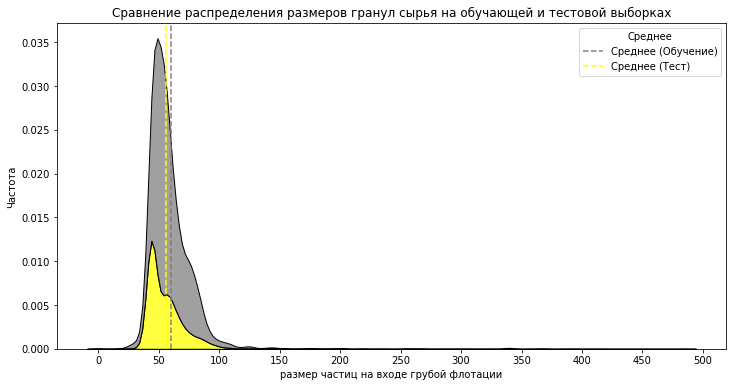

In [32]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

df_combined = pd.concat(
    [
        pd.DataFrame(
            {
                "rougher.input.feed_size": df_train["rougher.input.feed_size"],
                "Dataset": "Данные обучения",
            }
        ),
        pd.DataFrame(
            {
                "rougher.input.feed_size": df_test["rougher.input.feed_size"],
                "Dataset": "Тестовые данные",
            }
        ),
    ],
    ignore_index=True,
)

plt.figure(figsize=(12, 6))
palette = ["#808080", "#FFFF00"]
sbn.kdeplot(
    data=df_combined,
    x="rougher.input.feed_size",
    hue="Dataset",
    #     bins=200,
    #     kde=False,
    palette=palette,
    multiple="stack",
)

train_mean = df_train["rougher.input.feed_size"].mean()
plt.axvline(train_mean, color="#808080", linestyle="--", label="Среднее (Обучение)")

test_mean = df_test["rougher.input.feed_size"].mean()
plt.axvline(test_mean, color="#FFFF00", linestyle="--", label="Среднее (Тест)")

x_min, x_max = plt.xlim()
plt.xticks(np.arange(0, x_max, step=50))

plt.title(
    "Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках"
)
plt.xlabel("размер частиц на входе грубой флотации")
plt.ylabel("Частота")
plt.legend(title="Среднее")
plt.show()

#### Промежуточный выводы по графику  

На графике видно идентичное распределение размеров гранул сырья на обучающей и тестовой выборках. Средние значения размера также совпадают, что указывает на равномерное распределение гранул сырья на обучающей и тестовой выборках.  

### Суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.  

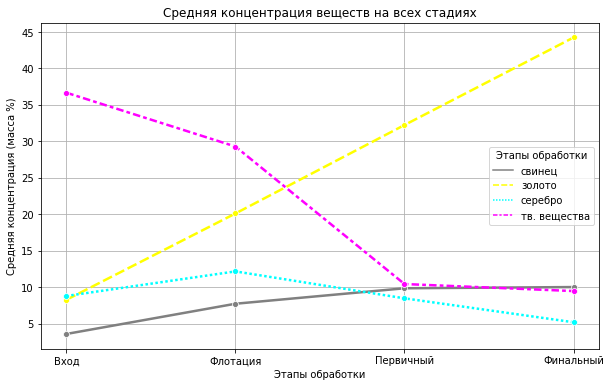

In [33]:
palette = ["#808080", "#FFFF00", "#00FFFF", "#FF00FF"]

data_mean_input = df_full[
    [
        "rougher.input.feed_pb",
        "rougher.input.feed_au",
        "rougher.input.feed_ag",
        "rougher.input.feed_sol",
    ]
].mean()

data_mean_output = df_full[
    [
        "rougher.output.concentrate_pb",
        "rougher.output.concentrate_au",
        "rougher.output.concentrate_ag",
        "rougher.output.concentrate_sol",
    ]
].mean()

primary_cleaner_mean = df_full[
    [
        "primary_cleaner.output.concentrate_pb",
        "primary_cleaner.output.concentrate_au",
        "primary_cleaner.output.concentrate_ag",
        "primary_cleaner.output.concentrate_sol",
    ]
].mean()

final_mean = df_full[
    [
        "final.output.concentrate_pb",
        "final.output.concentrate_au",
        "final.output.concentrate_ag",
        "final.output.concentrate_sol",
    ]
].mean()

data_mean = pd.DataFrame(
    {
        "Этап": ["Вход", "Флотация", "Первичный", "Финальный"],
        "свинец": [
            data_mean_input["rougher.input.feed_pb"],
            data_mean_output["rougher.output.concentrate_pb"],
            primary_cleaner_mean["primary_cleaner.output.concentrate_pb"],
            final_mean["final.output.concentrate_pb"],
        ],
        "золото": [
            data_mean_input["rougher.input.feed_au"],
            data_mean_output["rougher.output.concentrate_au"],
            primary_cleaner_mean["primary_cleaner.output.concentrate_au"],
            final_mean["final.output.concentrate_au"],
        ],
        "серебро": [
            data_mean_input["rougher.input.feed_ag"],
            data_mean_output["rougher.output.concentrate_ag"],
            primary_cleaner_mean["primary_cleaner.output.concentrate_ag"],
            final_mean["final.output.concentrate_ag"],
        ],
        "тв. вещества": [
            data_mean_input["rougher.input.feed_sol"],
            data_mean_output["rougher.output.concentrate_sol"],
            primary_cleaner_mean["primary_cleaner.output.concentrate_sol"],
            final_mean["final.output.concentrate_sol"],
        ],
    }
)

data_mean = data_mean.set_index("Этап")

plt.figure(figsize=(10, 6))
sbn.lineplot(data=data_mean, marker="o", palette=palette, linewidth=2.5)
plt.title("Средняя концентрация веществ на всех стадиях")
plt.grid()
plt.xlabel("Этапы обработки")
plt.ylabel("Средняя концентрация (масса %)")
plt.legend(title="Этапы обработки")
plt.show()

#### Промежуточный вывод по графику
На графике отображена средняя концентрация различных веществ (свинца, золота, серебра и твердых веществ) на разных стадиях обработки:

Основной целью процесса является повышение концентрации золота, что успешно достигается, в то время как содержание других веществ либо остается стабильным (серебро и свинец), либо снижается (твердые вещества).


final.output.recovery


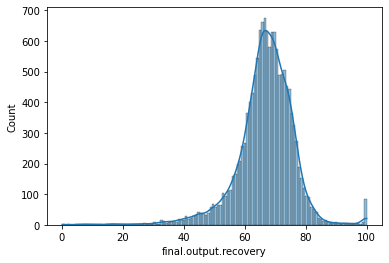

primary_cleaner.input.sulfate


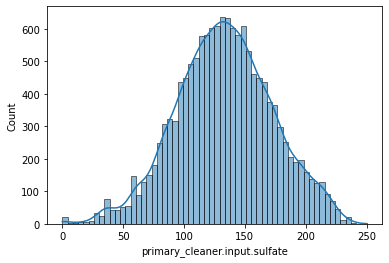

primary_cleaner.input.depressant


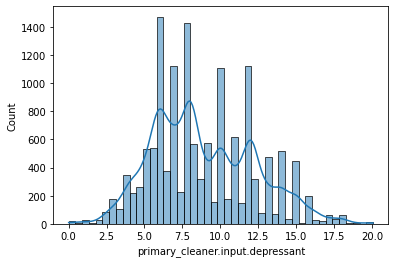

primary_cleaner.input.feed_size


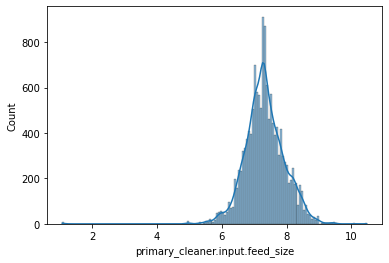

primary_cleaner.input.xanthate


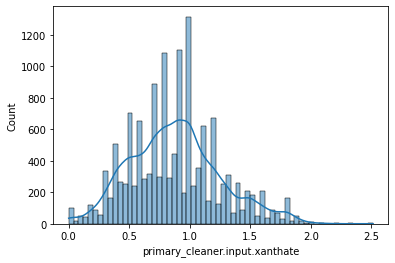

primary_cleaner.state.floatbank8_a_air


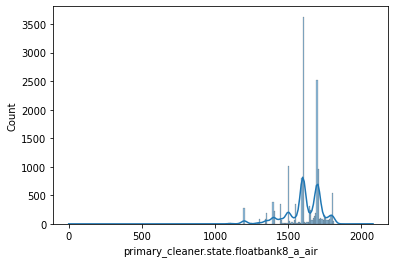

primary_cleaner.state.floatbank8_a_level


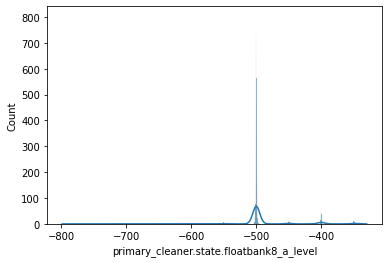

primary_cleaner.state.floatbank8_b_air


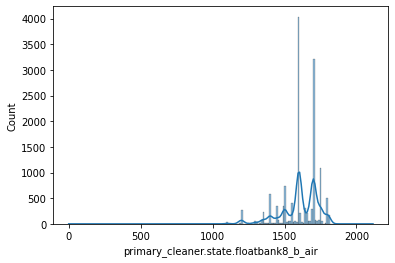

primary_cleaner.state.floatbank8_b_level


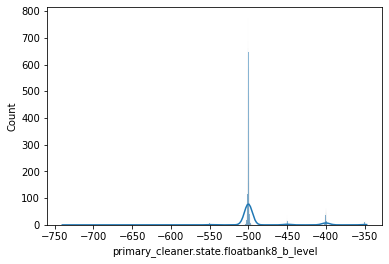

primary_cleaner.state.floatbank8_c_air


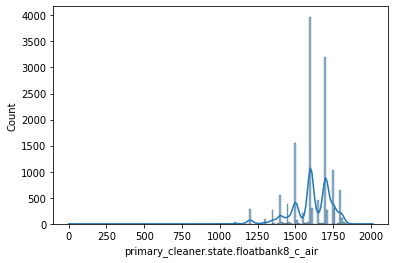

primary_cleaner.state.floatbank8_c_level


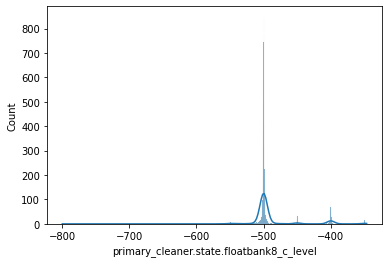

primary_cleaner.state.floatbank8_d_air


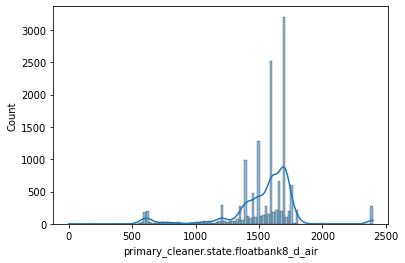

primary_cleaner.state.floatbank8_d_level


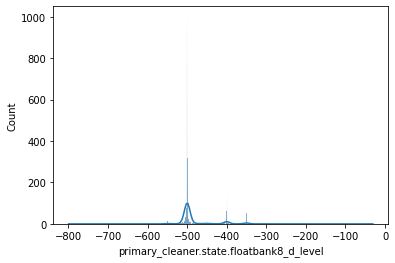

rougher.input.feed_ag


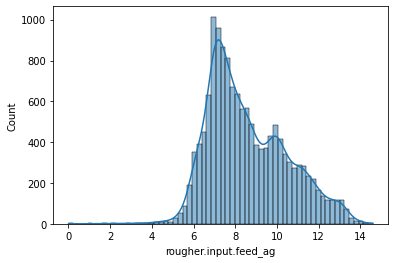

rougher.input.feed_pb


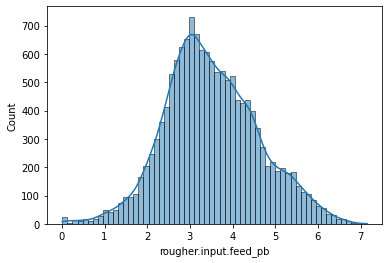

rougher.input.feed_rate


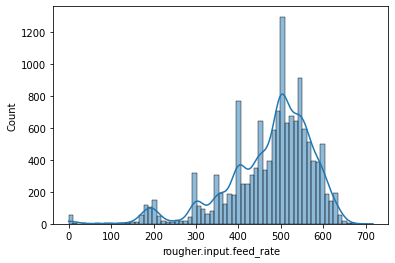

rougher.input.feed_size


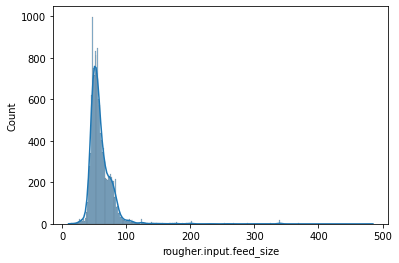

rougher.input.feed_sol


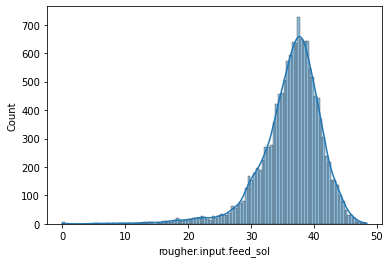

rougher.input.feed_au


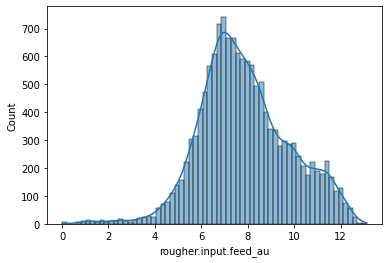

rougher.input.floatbank10_sulfate


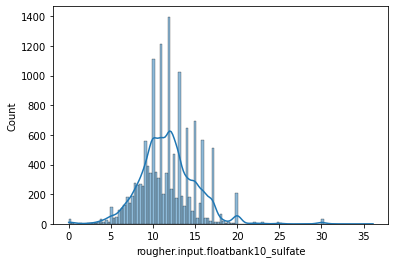

rougher.input.floatbank10_xanthate


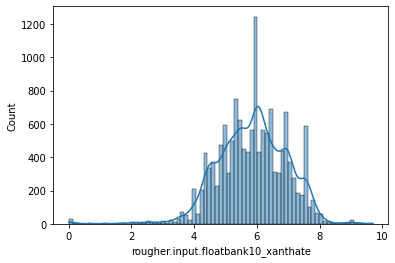

rougher.input.floatbank11_sulfate


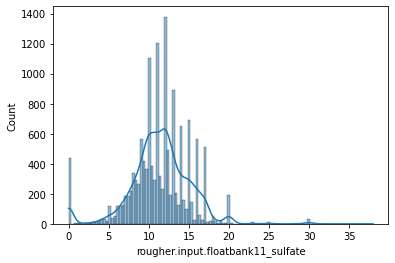

rougher.input.floatbank11_xanthate


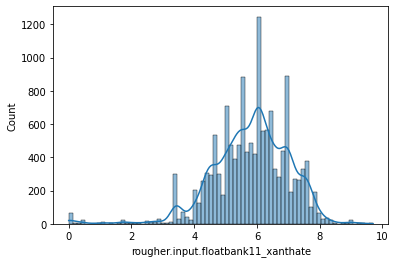

rougher.output.recovery


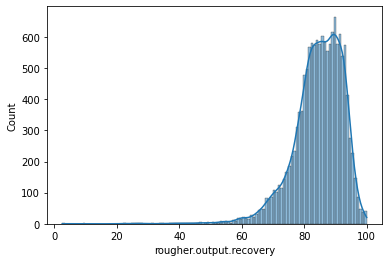

rougher.state.floatbank10_a_air


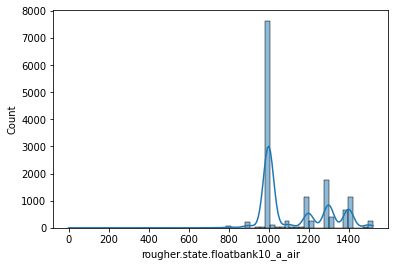

rougher.state.floatbank10_a_level


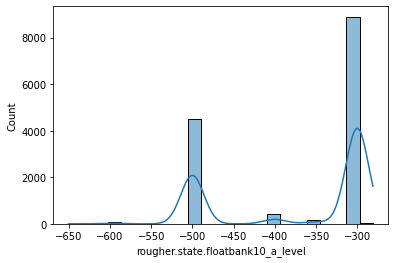

rougher.state.floatbank10_b_air


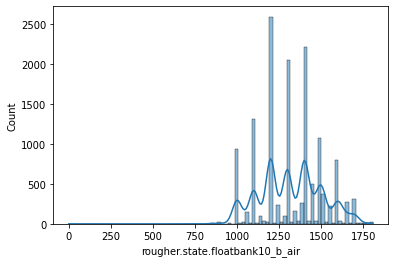

rougher.state.floatbank10_b_level


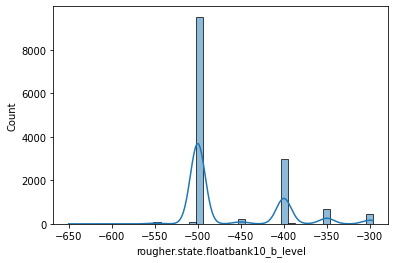

rougher.state.floatbank10_c_air


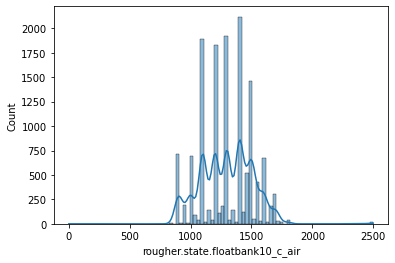

rougher.state.floatbank10_c_level


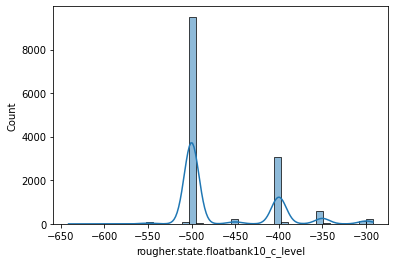

rougher.state.floatbank10_d_air


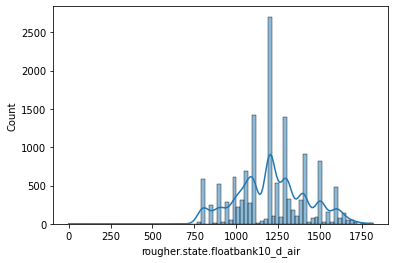

rougher.state.floatbank10_d_level


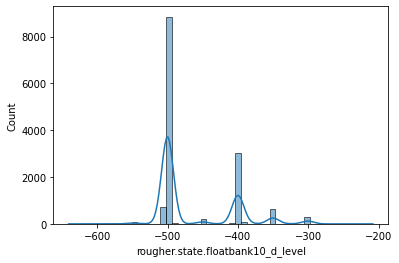

rougher.state.floatbank10_e_air


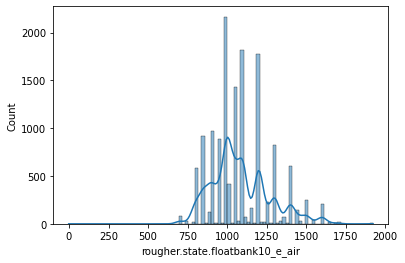

rougher.state.floatbank10_e_level


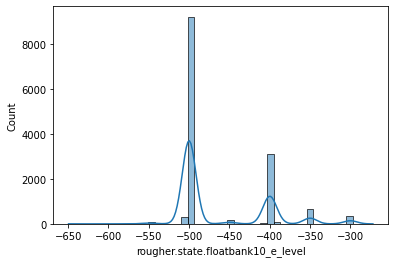

rougher.state.floatbank10_f_air


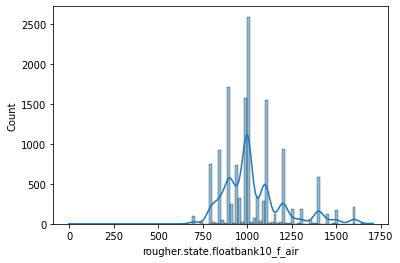

rougher.state.floatbank10_f_level


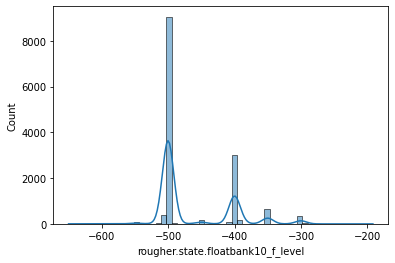

secondary_cleaner.state.floatbank2_a_air


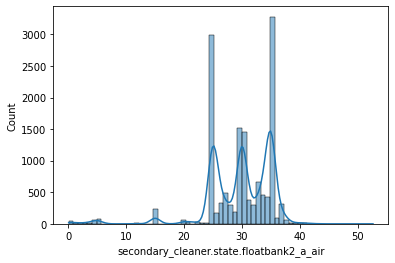

secondary_cleaner.state.floatbank2_a_level


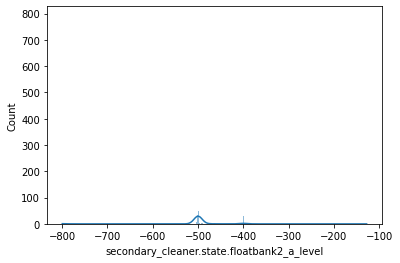

secondary_cleaner.state.floatbank2_b_air


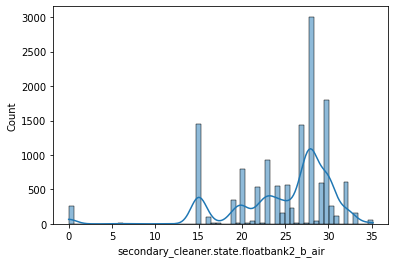

secondary_cleaner.state.floatbank2_b_level


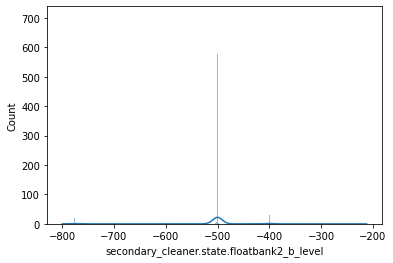

secondary_cleaner.state.floatbank3_a_air


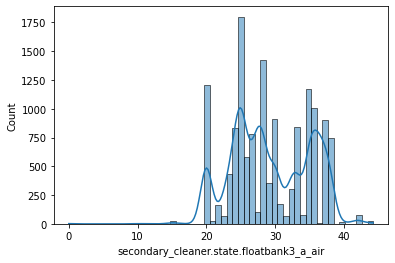

secondary_cleaner.state.floatbank3_a_level


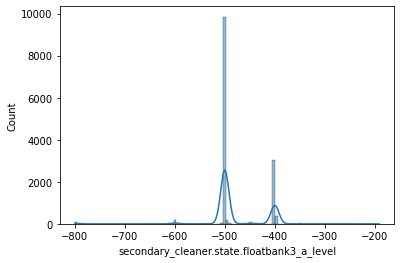

secondary_cleaner.state.floatbank3_b_air


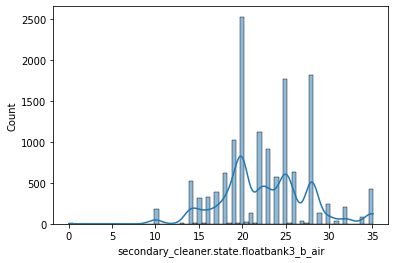

secondary_cleaner.state.floatbank3_b_level


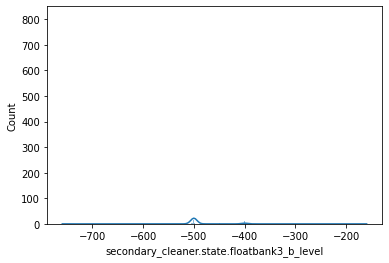

secondary_cleaner.state.floatbank4_a_air


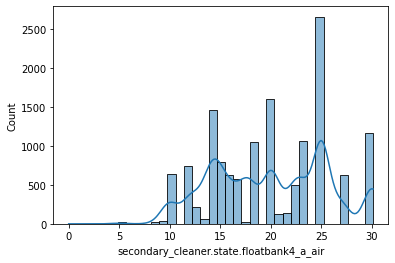

secondary_cleaner.state.floatbank4_a_level


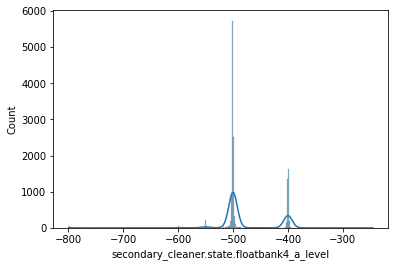

secondary_cleaner.state.floatbank4_b_air


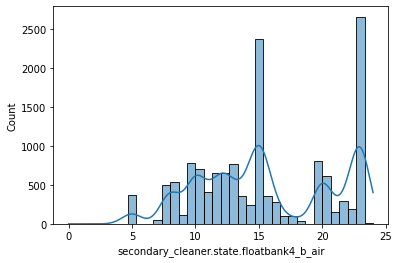

secondary_cleaner.state.floatbank4_b_level


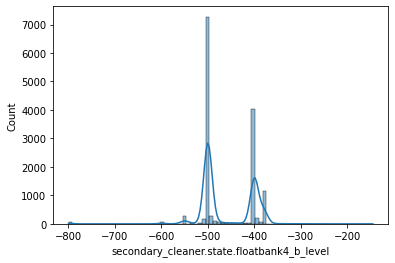

secondary_cleaner.state.floatbank5_a_air


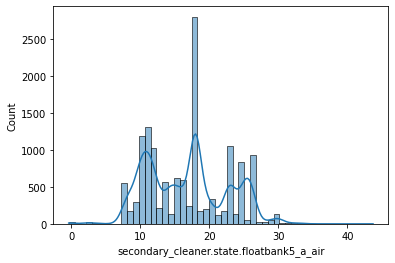

secondary_cleaner.state.floatbank5_a_level


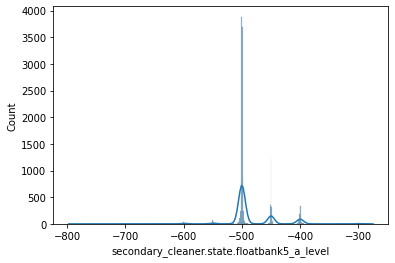

secondary_cleaner.state.floatbank5_b_air


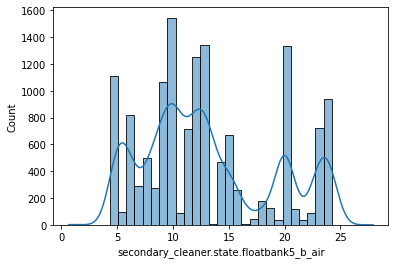

secondary_cleaner.state.floatbank5_b_level


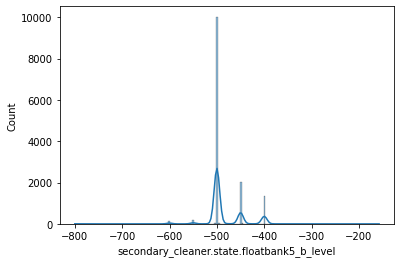

secondary_cleaner.state.floatbank6_a_air


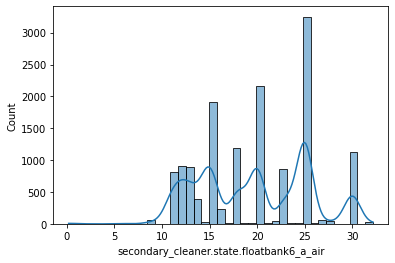

secondary_cleaner.state.floatbank6_a_level


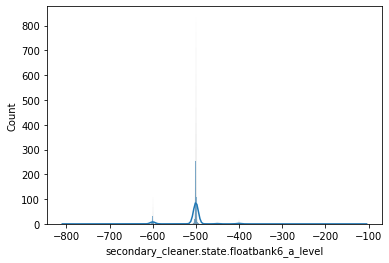

In [34]:
# Проверим на наличие анамалий.
for i in df_train.columns[1:]:  # Начнем со второго элемента тк первый date type/object
    print(i)
    plt.figure()
    sbn.histplot(df_train[i], kde=True)
    plt.show()

## Модель

### Напишите функцию для вычисления итоговой sMAPE.


sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).  
$$
sMAPE =  \frac{1}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y}_i|}{0.5 \times (|y_i| + |\hat{y}_i|)} \times 100 \%,
$$
Чем меньше значение sMAPE, тем лучше работает модель. Она стремится к нулю, что означает идеальное совпадение предсказаний с реальными значениями.

Нужно спрогнозировать сразу две величины:  
    * эффективность обогащения чернового концентрата `rougher.output.recovery`;  
    * эффективность обогащения финального концентрата `final.output.recovery`. 

Итоговая метрика складывается из двух величин:
$$
sMAPE(overall) = 0.25 \times sMAPE(rougher) + 0.75 \times sMAPE(final)
$$

.

In [35]:
# ф-ии для расчета sMAPE и final_s_mape
def s_mape(target, prediction) -> float:
    """
    Ф-я для расчета sMAPE:
    target - истинные значения
    prediction - предсказанные значения
    return: sMAPE-значение
    """
    # Количество наблюдений
    N = len(target)

    # Вычисляем разности и суммы для каждого наблюдения
    abs_diff = np.abs(target - prediction)
    abs_sum = 0.5 * (np.abs(target) + np.abs(prediction))

    # Вычисляем sMAPE
    smape_value = (100 / N) * np.sum(abs_diff / abs_sum)
    return smape_value


"""Чтобы использовать свою метрику s_mape с cross_val_score, необходимо обернуть её в функцию,
совместимую с scikit-learn, и задать её как метрику scoring.
Для этого используем make_scorer из sklearn.metrics, где указываем свою функцию и параметры."""
smape_scorer = make_scorer(
    s_mape, greater_is_better=False
)  # False, чтобы минимизировать sMAPE


def final_s_mape(rougher, final) -> float:
    """Итоговая метрика"""
    return 0.25 * rougher + 0.75 * final

In [36]:
# Признаки для обучения модели df_train
train_features = df_train.drop(
    columns=["rougher.output.recovery", "final.output.recovery", "date"]
).reset_index(drop=True)

# целевое значение для *rougher.output.recovery — коэффициент извлечения на грубой флотации.*
train_rougher_target = df_train["rougher.output.recovery"].reset_index(drop=True)

# целевое значение для *final.output.recovery — коэффициент извлечения в конечном этапе.*
train_final_target = df_train["final.output.recovery"].reset_index(drop=True)

# -------------------------------------------------------------

# Признаки для обучения модели df_test
test_features = df_test.drop(
    columns=["rougher.output.recovery", "final.output.recovery", "date"]
).reset_index(drop=True)

# целевое значение для *rougher.output.recovery — коэффициент извлечения на грубой флотации.*
test_rougher_target = df_test["rougher.output.recovery"].reset_index(drop=True)

# целевое значение для *final.output.recovery — коэффициент извлечения в конечном этапе.*
test_final_target = df_test["final.output.recovery"].reset_index(drop=True)

In [37]:
print("Строк в df_train базе", train_features.shape)
print(train_rougher_target.shape)
print(train_final_target.shape)
print("Строк в df_test базе", test_features.shape)
print(test_rougher_target.shape)
print(test_final_target.shape)

Строк в df_train базе (14149, 52)
(14149,)
(14149,)
Строк в df_test базе (5290, 52)
(5290,)
(5290,)


У нас данные уже разбиты на тренировочную и тестовую выборки, кросс-валидацию можно применить только к тренировочной выборке (train), чтобы настроить и проверить модель перед финальной проверкой на тестовой выборке (test). Это поможет избежать использования тестовой выборки до финальной оценки и сохранить её для итоговой проверки.

### Обучите разные модели и оцените их качество.

#### RandomForestRegressor случайный лес. (RF)

In [ ]:
# ф-я для определения лучших настроек модели RandomForestRegressor
def score_RF(train_features, train_name_target):
    param_grid = {"n_estimators": range(10, 60, 10), "max_depth": range(1, 6, 2)}
    model = RandomForestRegressor(random_state=12345)
    grid_search = GridSearchCV(model, param_grid, scoring=smape_scorer, cv=5)
    grid_search.fit(train_features, train_name_target)

    # Получаем лучшую модель и метрику
    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_

    return best_score, best_model


# rougher.output.recovery
score_rougher = score_RF(train_features, train_rougher_target)
print("Лучший результат для грубой флотации:", score_rougher)

# final.output.recovery
score_final = score_RF(train_features, train_final_target)
print("Лучший результат для финальной флотации:", score_final)

# Итоговая метрика
score_RF_final = final_s_mape(score_rougher[0], score_final[0])
print("Итоговая метрика score_RF_final:", score_RF_final)

#### DecisionTreeRegressor - дерево решений (DTR)

In [ ]:
def score_DTR(train_features, train_name_target):

    param_grid = {"max_depth": range(1, 6, 2)}
    model = DecisionTreeRegressor(random_state=12345)
    grid_search = GridSearchCV(model, param_grid, scoring=smape_scorer, cv=5)
    grid_search.fit(train_features, train_name_target)

    # Получаем лучшую модель и метрику
    best_model = grid_search.best_estimator_
    best_score = (
        -grid_search.best_score_
    )  # так как в нашем случае smape_scorer отрицательный

    return best_score, best_model


# Применение для грубой и финальной флотации
score_rougher = score_DTR(train_features, train_rougher_target)
print("Лучший результат для грубой флотации:", score_rougher)

score_final = score_DTR(train_features, train_final_target)
print("Лучший результат для финальной флотации:", score_final)

# Итоговая метрика
score_DTR_final = final_s_mape(score_rougher[0], score_final[0])
print("Итоговая метрика score_DTR_final:", score_DTR_final)

#### LogisticRegression -логическая регрессия (LR)

In [ ]:
# ф-я для определения лучших настроек модели LinearRegression
# %%time
def score_LR(train_features, train_name_target):
    model = LinearRegression()
    score = -cross_val_score(
        model, train_features, train_name_target, scoring=smape_scorer, cv=3
    ).mean()

    return score, model


# rougher.output.recovery — коэффициент извлечения на грубой флотации.
score_rougher = score_LR(train_features, train_rougher_target)
print(score_rougher)
# final.output.recovery — коэффициент извлечения в конечном этапе.
score_final = score_LR(train_features, train_final_target)
print(score_final)
# Считаем итоговую метрику по модели
score_LR_final = final_s_mape(score_rougher[0], score_final[0])
print("Итоговая метрика score_LR_final", score_LR_final)

Получаем три результата

In [ ]:
print("Итоговая метрика score_RF_final", score_RF_final)  # RandomForestRegressor
print("Итоговая метрика score_DTR_final", score_DTR_final)  # DecisionTreeRegressor
print("Итоговая метрика score_LR_final", score_LR_final)  # LinearRegression

#### Вывод по моделям  
По итогу средняя ошибка прогноза составляет около 8.44% от фактических показателей эффективности обогащения. У модели **RandomForestRegressor**

### Проверка на тестовых данных

Модель RandomForestRegressor показала лучшие результаты вот с такими настройками  

rougher.output.recovery — коэффициент извлечения на грубой флотации.  
sMAPE = (6.4294813142805465, RandomForestRegressor(max_depth=5, n_estimators=20, random_state=12345))  

final.output.recovery — коэффициент извлечения в конечном этапе.  
sMAPE = (9.111460578622276, RandomForestRegressor(max_depth=5, n_estimators=40, random_state=12345))  



In [ ]:
rougher_model = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=12345)
rougher_model.fit(train_features, train_rougher_target)
rougher_predictions = rougher_model.predict(test_features)
rougher_smape = s_mape(test_rougher_target, rougher_predictions)

print(rougher_smape)

In [ ]:
final_model = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=12345)
final_model.fit(train_features, train_final_target)
final_predictions = final_model.predict(test_features)
final_smape = s_mape(test_final_target, final_predictions)

print(final_smape)

In [ ]:
final_score = final_s_mape(rougher_smape, final_smape)
print("Итоговая метрика на тестовой выборке:", final_score)

In [ ]:
def score_dummy_model(train_features, train_name_target):
    dummy_model = DummyRegressor(
        strategy="median"
    )  # Константная модель предсказывает медиану
    dummy_model.fit(train_features, train_name_target)

    dummy_score = -cross_val_score(
        dummy_model, train_features, train_name_target, scoring=smape_scorer, cv=5
    ).mean()
    return dummy_score


# Сравниваем модели для грубой и финальной флотации
dummy_score_rougher = score_dummy_model(train_features, train_rougher_target)
dummy_score_final = score_dummy_model(train_features, train_final_target)

print("Dummy модель (грубая флотация):", dummy_score_rougher)
print("Dummy модель (финальная флотация):", dummy_score_final)

# Вычисляем финальную метрику для Dummy модели
dummy_RF_final = final_s_mape(dummy_score_rougher, dummy_score_final)
print("Итоговая метрика для Dummy модели:", dummy_RF_final)

# Для сравнения с основной моделью:
score_rougher = score_RF(train_features, train_rougher_target)
print("Основная модель (грубая флотация):", score_rougher)

score_final = score_RF(train_features, train_final_target)
print("Основная модель (финальная флотация):", score_final)

score_RF_final = final_s_mape(score_rougher[0], score_final[0])
print("Итоговая метрика для основной модели score_RF_final:", score_RF_final)

Основная модель успешно превзошла Dummy модель по всем этапам процесса обогащения.

## Вывод
Полученное значение итоговой метрики на тестовой выборке составляет 7.44. Это указывает на среднюю процентную ошибку модели при прогнозировании эффективности обогащения для двух целевых показателей:

rougher.output.recovery - коэффициент извлечения на грубой флотации.  
final.output.recovery - коэффициент извлечения в конечном этапе.  